In [1]:
# Table of content 

## 1. Import libraries
## 2. Import dataset
## 3. EDA 
   # A. Check the number of rows and columns
   # B. Drop columns that are irrelevant 
   # C. Check corrlation
   # D. Check for missing values 
   # E. Preform basic statistical analysis
   # F. Check data type for each column
## 4. Visualize Data
## 5. K-Mean Cluster Analysis
## 6. Linear Regression Model 
## 7. Make Predictions on Model 

In [2]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
#import dataset
c02_data = pd.read_csv('FuelConsumptionCo2.csv')
c02_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## EDA

In [4]:
# check the number of rows and columns 
c02_data.shape

(1067, 13)

In [5]:
# drop modelyear columns from dataset as all model years are from 2014 
c02_data.drop('MODELYEAR', axis=1, inplace=True)

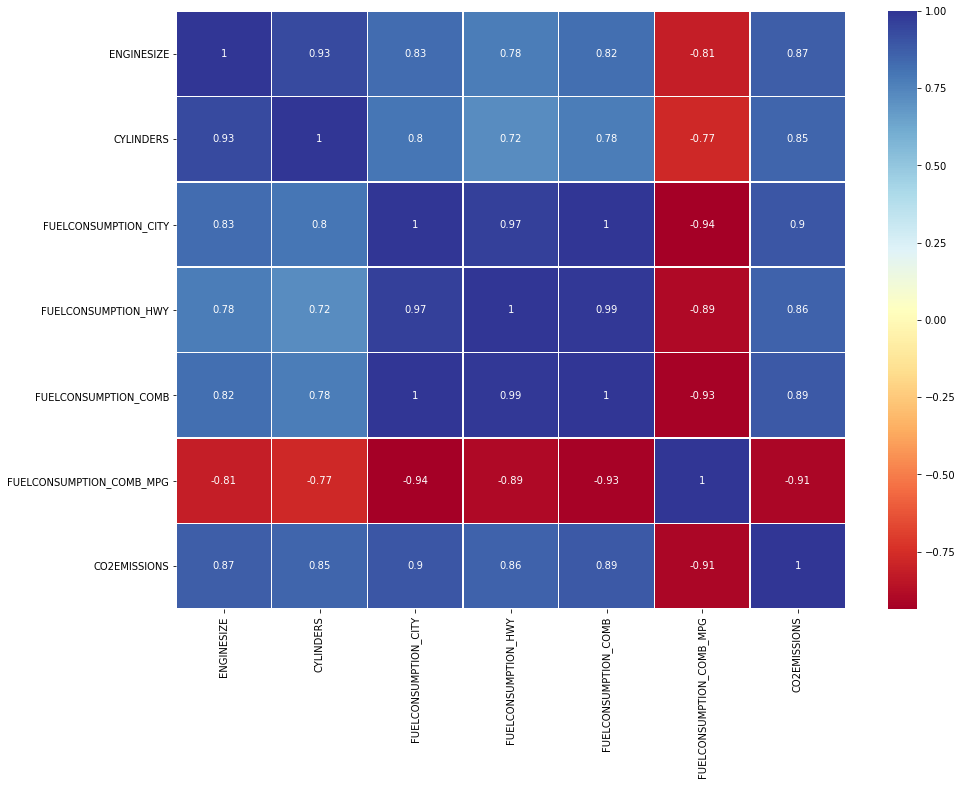

In [6]:
# plot corrlation using heatmap 
plt.figure(figsize=(15,11))
sns.heatmap(c02_data.corr(),annot= True, cmap = 'RdYlBu',linewidths=0.5)

In [7]:
# check for missing values 
c02_data.isnull().sum()

MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [8]:
# basic statistical analysis 
c02_data.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
# ckeck data type
c02_data.dtypes

MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

## Visualize Data 

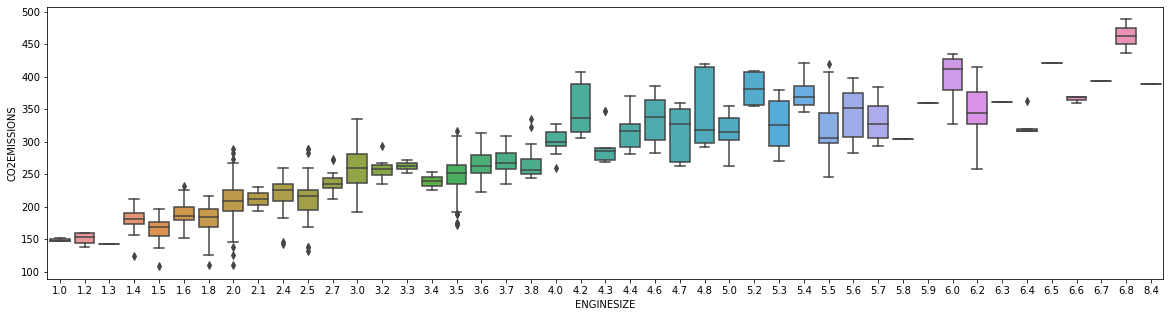

In [10]:
# use boxplot to check the relation between engine size and c02 emissions
plt.figure(figsize=(20,5))
sns.boxplot(x="ENGINESIZE", y="CO2EMISSIONS", data=c02_data)

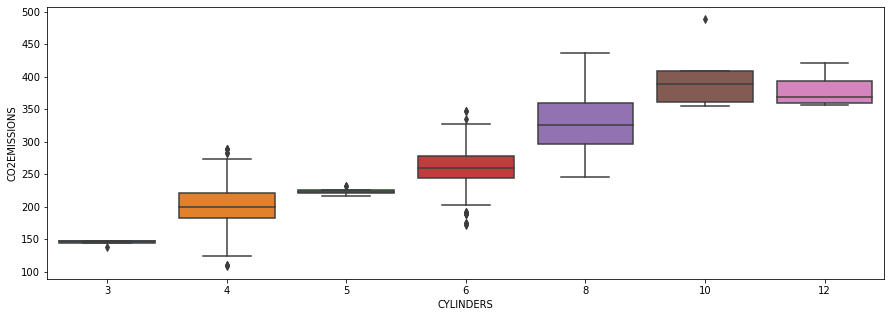

In [11]:
# use boxplot to check the relation between cylinder size and c02 emissions
plt.figure(figsize=(15,5))
sns.boxplot(x="CYLINDERS", y="CO2EMISSIONS", data=c02_data)

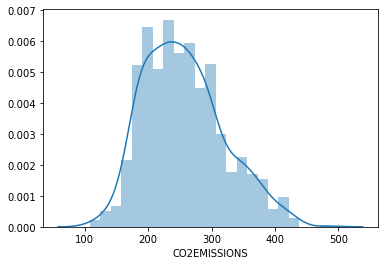

In [12]:
# distribution plot of c02 emissions 
sns.distplot(c02_data['CO2EMISSIONS'])

## K-Mean Cluster Analysis

In [13]:
# select all numaric columns then scale them 
c02_datanu = c02_data.select_dtypes(include=np.number)
x = c02_datanu.values
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

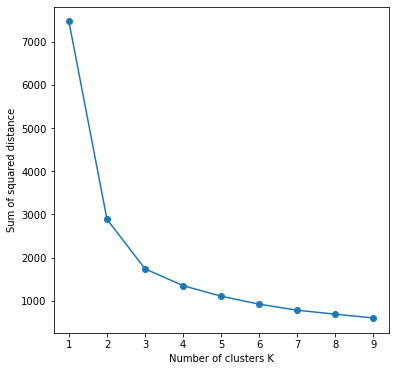

In [14]:
# Plot sse against k to find K using the elbow method
sse = []
kvalues = range(1, 10)

for k in kvalues:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(kvalues, sse, '-o')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of squared distance');

In [15]:
# create cluster object and set n_cluster to 3, then train and predict model
# add the predicted cluster outcome to the c02_data dateset and label it Cluster_Groups
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(X)
c02_data['Cluster_Groups'] = y_pred
c02_data.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,Cluster_Groups
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0


1    436
0    414
2    217
Name: Cluster_Groups, dtype: int64


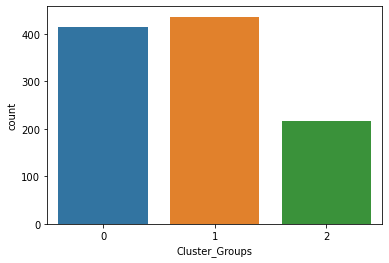

In [16]:
# print the number of points in each cluster  
sns.countplot(c02_data["Cluster_Groups"])
print(c02_data.Cluster_Groups.value_counts())

In [17]:
# find the mean values in each columns for each cluster group 
c02_data.groupby('Cluster_Groups').mean()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
Cluster_Groups,,,,,,,
0,3.698551,6.289855,13.788406,9.603382,11.907729,23.963768,269.937198
1,2.031193,4.135321,9.709174,7.203899,8.587385,33.527523,198.160550
2,5.316590,8.184332,19.565899,13.791244,16.971889,16.930876,346.746544


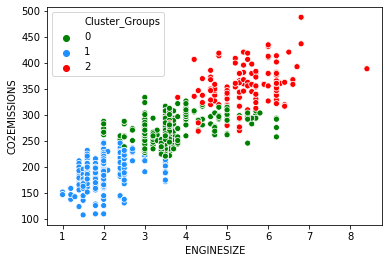

In [18]:
# use scatterplot to see the difference between engine size and c02 emissions for each cluster group 
sns.scatterplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', hue = "Cluster_Groups",
                data = c02_data, alpha = 1,palette=['green', 'dodgerblue','red'])

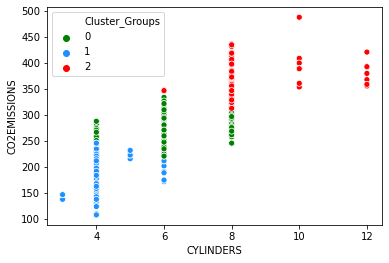

In [19]:
# use scatterplot to see the difference between cylinder size and c02 emissions for each cluster group 
sns.scatterplot(x = 'CYLINDERS', y = 'CO2EMISSIONS', hue = "Cluster_Groups",
                data = c02_data, alpha = 1,palette=['green', 'dodgerblue','red'])

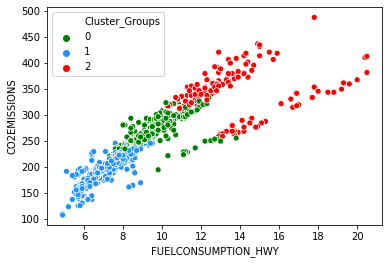

In [20]:
# use scatterplot to see the difference between fuel consumption on highway and c02 emissions for each cluster group 
sns.scatterplot(x = 'FUELCONSUMPTION_HWY', y = 'CO2EMISSIONS', hue = "Cluster_Groups",
                data = c02_data, alpha = 1,palette=['green', 'dodgerblue','red'])

## Linear Regression Algorithm

In [21]:
# select input features (independent variables) and target (c02emissions) then scale features 
# afterward split data into train and test subsets, followed by creating object for LinearRegression model 
# then train model using training subset
# create prediction object called predlr and predict on test_x 
x = c02_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']].values
y = c02_data[['CO2EMISSIONS']].values
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=.20, random_state=1)
LM = linear_model.LinearRegression()
LM.fit(train_x, train_y)
predlr = LM.predict(test_x)

In [22]:
print('Intercept value:',LM.intercept_)
print('Coefficient values:',LM.coef_)

Intercept value: [256.57393286]
Coefficient values: [[16.51204568 11.41661804 14.33807371 20.28257304]]


In [23]:
#Evaluation 
print('R^2 SCORE:', LM.score(test_x, test_y))
print('MSE:', mean_squared_error(test_y, predlr))

R^2 SCORE: 0.8640143908947837
MSE: 551.6184790131966


### Prediction

In [24]:
# below values are scaled 
A = X[:1]
B = X[7:8]
print(A)
print(B)

[[-0.9512918  -0.99896853 -0.82855772 -0.88430407]]
[[ 0.24992518  0.11424235 -0.12112521 -0.13802708]]


In [25]:
print('Predicted c02 emissions for A using A inputs', LM.predict([[-0.9512918 , -0.99896853, -0.82855772, -0.88430407]]))
print('Actual c02 emissions for A ', y[:1])

Predicted c02 emissions for A using A inputs [[199.64543351]]
Actual c02 emissions for A  [[196]]


In [26]:
print('Predicted c02 emissions for B using B inputs', LM.predict([[0.24992518,  0.11424235, -0.12112521, -0.13802708]]))
print('Actual c02 emissions for B', y[7:8])

Predicted c02 emissions for B using B inputs [[257.4687236]]
Actual c02 emissions for B [[255]]
